# Load dataset

Data format:

|id|word_seq|tag_seq|
|:--|:--|:--|
|index of the sentence|tokenized words|corresponding NER tags|
|0|`["protection", "calves", ...]`|`["O", "LIVESTOCK", ...]`|
|1|`["prevent", "diarrhea",...]` |`["O", "DISEASE_OR_SYNDROME", ...]`|
|...|...|...|



There are 64 categories of NER tags (plus 1 padding token).

The ground-truth tags are provided for the training and testing set, while being omitted in the testing set.

In [2]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pickle as pkl

train_dict = pkl.load(open("data/train.pkl", "rb"))
val_dict = pkl.load(open("data/val.pkl", "rb"))
test_dict = pkl.load(open("data/test.pkl", "rb"))
print("keys in train_dict:", train_dict.keys())
print("keys in val_dict:", val_dict.keys())
print("keys in test_dict:", test_dict.keys())

keys in train_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in val_dict: dict_keys(['id', 'word_seq', 'tag_seq'])
keys in test_dict: dict_keys(['id', 'word_seq'])


In [3]:
# an entry of the dataset
print("index:", train_dict["id"][0])
print(*zip(train_dict["word_seq"][0], train_dict["tag_seq"][0]))

index: 0
('Protection', 'O') ('of', 'O') ('calves', 'LIVESTOCK') ('against', 'O') ('fatal', 'O') ('enteric', 'DISEASE_OR_SYNDROME') ('colibacillosis', 'DISEASE_OR_SYNDROME') ('by', 'O') ('orally', 'GENE_OR_GENOME') ('administered', 'GENE_OR_GENOME') ('Escherichia', 'GENE_OR_GENOME') ('coli', 'GENE_OR_GENOME') ('K99', 'GENE_OR_GENOME') ('-', 'O') ('specific', 'CARDINAL') ('monoclonal', 'CARDINAL') ('antibody', 'CARDINAL') ('.', 'O') ('A', 'O') ('monoclonal', 'CHEMICAL') ('antibody', 'CHEMICAL') ('(', 'O') ('MCA', 'GENE_OR_GENOME') (')', 'O') ('to', 'O') ('enterotoxigenic', 'CHEMICAL') ('Escherichia', 'CHEMICAL') ('coli', 'CHEMICAL') ('K99', 'O') ('antigen', 'O') ('agglutinated', 'O') ('K99+', 'GENE_OR_GENOME') ('enterotoxigenic', 'GENE_OR_GENOME') ('E', 'GENE_OR_GENOME') ('.', 'O') ('coli', 'CHEMICAL') ('strains', 'CHEMICAL') ('B44', 'CHEMICAL') ('(', 'O') ('O9', 'O') (':', 'O') ('K30', 'O') (';', 'O') ('K99', 'O') (';', 'O') ('F41', 'O') (':', 'O') ('H-', 'O') (')', 'O') ('and', 'O') (

In [4]:
# all the NER tags:
from itertools import chain
print("count of the NER tags:", len(set(chain(*train_dict["tag_seq"]))))
print("all the NER tags:", set(chain(*train_dict["tag_seq"])))

count of the NER tags: 65
all the NER tags: {'ORGANISM', 'GROUP_ATTRIBUTE', 'PHYSICAL_SCIENCE', '_t_pad_', 'CELL', 'BODY_PART_ORGAN_OR_ORGAN_COMPONENT', 'SIGN_OR_SYMPTOM', 'GPE', 'CELL_COMPONENT', 'FOOD', 'PRODUCT', 'EVOLUTION', 'QUANTITY', 'ORDINAL', 'LIVESTOCK', 'LABORATORY_PROCEDURE', 'VIRAL_PROTEIN', 'MACHINE_ACTIVITY', 'BODY_SUBSTANCE', 'RESEARCH_ACTIVITY', 'ORGAN_OR_TISSUE_FUNCTION', 'CELL_OR_MOLECULAR_DYSFUNCTION', 'EDUCATIONAL_ACTIVITY', 'CELL_FUNCTION', 'FAC', 'ANATOMICAL_STRUCTURE', 'TISSUE', 'CORONAVIRUS', 'SOCIAL_BEHAVIOR', 'LABORATORY_OR_TEST_RESULT', 'INJURY_OR_POISONING', 'WILDLIFE', 'GENE_OR_GENOME', 'LOC', 'SUBSTRATE', 'INDIVIDUAL_BEHAVIOR', 'MATERIAL', 'MONEY', 'LAW', 'HUMAN-CAUSED_PHENOMENON_OR_PROCESS', 'DATE', 'EVENT', 'THERAPEUTIC_OR_PREVENTIVE_PROCEDURE', 'GOVERNMENTAL_OR_REGULATORY_ACTIVITY', 'ARCHAEON', 'O', 'DIAGNOSTIC_PROCEDURE', 'PERCENT', 'VIRUS', 'GROUP', 'CHEMICAL', 'CARDINAL', 'IMMUNE_RESPONSE', 'NORP', 'EUKARYOTE', 'DAILY_OR_RECREATIONAL_ACTIVITY', 'TIM

In [75]:
a =[]
for sent in test_dict["word_seq"]:
    length = 0
    for w in sent:
        if w != "_w_pad_":
            length += 1
    a.append(length)
a

[128,
 6,
 128,
 128,
 73,
 128,
 127,
 128,
 128,
 128,
 128,
 12,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 84,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 4,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 76,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 77,
 128,
 128,
 128,
 128,
 128,
 12,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 14,
 121,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 89,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 9,
 128,
 128,
 128,
 128,
 128,
 39,
 128,
 128,
 128,
 128,
 78,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 128,
 1

In [62]:
d = dict()

all_tag_seq = list(chain(*train_dict["tag_seq"]))

for tag in set(all_tag_seq):
    d[tag] = list(all_tag_seq).count(tag)

sorted_most = {k:v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]}
print(sorted_most)

{'O': 2110794, '_t_pad_': 229579, 'GENE_OR_GENOME': 146376, 'CHEMICAL': 145611, 'DISEASE_OR_SYNDROME': 77719, 'DATE': 33373, 'CORONAVIRUS': 28403, 'ORG': 27371, 'CARDINAL': 25852, 'CELL': 20685}


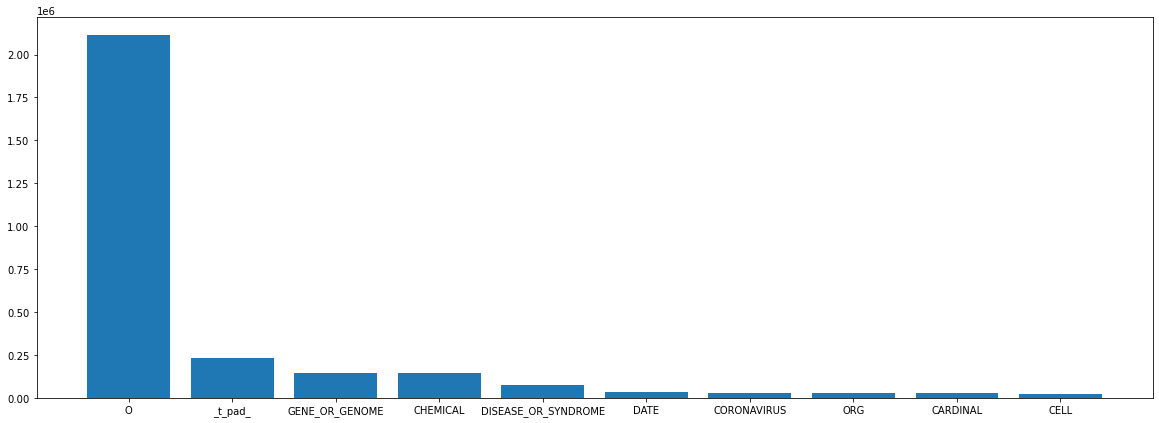

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.bar(np.arange(10), sorted_most.values())
plt.xticks(np.arange(10), sorted_most.keys());

# Prepare the data for training

In [4]:
# prepare word vocab and tag vocab

vocab_dict = {'_unk_': 0, '_w_pad_': 1}

for doc in train_dict['word_seq']:
    for word in doc:
        if(word not in vocab_dict):
            vocab_dict[word] = len(vocab_dict)

tag_dict = {'_t_pad_': 0} # add a padding token

for tag_seq in train_dict['tag_seq']:
    for tag in tag_seq:
        if(tag not in tag_dict):
            tag_dict[tag] = len(tag_dict)
word2idx = vocab_dict
idx2word = {v:k for k,v in word2idx.items()}
tag2idx = tag_dict
idx2tag = {v:k for k,v in tag2idx.items()}            

print("size of word vocab:", len(vocab_dict), "size of tag_dict:", len(tag_dict))

size of word vocab: 82275 size of tag_dict: 65


In [5]:
# The maximum length of a sentence is set to 128
max_sent_length = 128

train_tokens = np.array([[word2idx[w] for w in doc] for doc in train_dict['word_seq']])
val_tokens = np.array([[word2idx.get(w, 0) for w in doc] for doc in val_dict['word_seq']])
test_tokens = np.array([[word2idx.get(w, 0) for w in doc] for doc in test_dict['word_seq']])


train_tags = [[tag2idx[t] for t in t_seq] for t_seq in train_dict['tag_seq']]
train_tags = np.array([to_categorical(t_seq, num_classes=len(tag_dict)) for t_seq in train_tags])

val_tags = [[tag2idx[t] for t in t_seq] for t_seq in val_dict['tag_seq']]
val_tags = np.array([to_categorical(t_seq, num_classes=len(tag_dict)) for t_seq in val_tags])

# we don't have test tags

In [6]:
print("training size:", train_tokens.shape, "tag size:", train_tags.shape)
print("validating size:", val_tokens.shape, "tag size:", val_tags.shape)

training size: (23600, 128) tag size: (23600, 128, 65)
validating size: (2950, 128) tag size: (2950, 128, 65)


In [7]:
# an example of training instance and training tags.
print(train_tokens[0,:10], np.argmax(train_tags[0, :10, :], axis=1))

[ 2  3  4  5  6  7  8  9 10 11] [1 1 2 1 1 3 3 1 4 4]


# Two simple models and codes for evaluation

1. Predict all the tags as "O".
2. Random guess

You could use the `calc_accuracy` function to evaluate the accuracy of your predictions.

In [8]:
# Provided function to test accuracy
# You could check the validation accuracy to select the best of your models
def calc_accuracy(preds, tags, padding_id="_t_pad_"):
    """
        Input:
            preds (np.narray): (num_data, length_sentence)
            tags  (np.narray): (num_data, length_sentence)
        Output:
            Proportion of correct prediction. The padding tokens are filtered out.
    """
    preds_flatten = preds.flatten()
    tags_flatten = tags.flatten()
    non_padding_idx = np.where(tags_flatten!=padding_id)[0]
    
    return sum(preds_flatten[non_padding_idx]==tags_flatten[non_padding_idx])/len(non_padding_idx)

In [9]:
# Check accuracy on the training set
train_tags_by_idx = np.argmax(train_tags, axis=2)
train_labels = np.array([[idx2tag[p] for p in preds] for preds in train_tags_by_idx])

print(calc_accuracy(train_labels, train_labels))

# Predict all labels as "O"
baseline1_train_preds = np.array([[idx2tag[p] for p in preds] for preds in np.ones(train_labels.shape)])
print("baseline 1, make all predictions as 1. Acc:", 
      calc_accuracy(baseline1_train_preds, 
                    train_labels))

# Randomly guess labels.
baseline2_train_preds = np.array([[idx2tag[p] for p in preds] for preds in np.random.randint(1, len(tag_dict), train_labels.shape)]) 
print("baseline 2, Random guess. Acc:", 
      calc_accuracy(baseline2_train_preds,
                    train_labels))

1.0
baseline 1, make all predictions as 1. Acc: 0.7562260387120905
baseline 2, Random guess. Acc: 0.015637242626076544


# Output format

In this project, you should predict the NER tags for the test set tokens.

The index of test set starts from 0 and ends with 2949.

You should write the predictions into a .csv file, where the first column is the test indexes in ascending order, and the second column is a json format prediction list.

E.g.

|id|labels|
|:--:|:--:|
|0|`['O', 'O', 'CHEMICAL', 'VIRUS', ...]`|
|1|`['O', 'O', 'GENE_OR_GENOME', ...]`|
|...|...|

Format requirements:
1. The first column `id` should be an integer, in ascending order, starting from 0 and corresponding to the index in test_dict.
2. The second column `labels` should be a dumped string using json, storing the your predictions for each token. The size of the list should be exactly 128, including padding tokens.

### For example, this is your prediction for the test set:

In [10]:
test_preds_numerical = np.random.randint(1, len(tag_dict), 
                                         (len(test_dict["id"]), max_sent_length))
test_preds = np.array([[idx2tag[p] for p in preds] for preds in test_preds_numerical])
print(test_preds.shape)
print(test_preds[0])

(2950, 128)
['HUMAN-CAUSED_PHENOMENON_OR_PROCESS' 'VIRUS' 'SOCIAL_BEHAVIOR'
 'BODY_PART_ORGAN_OR_ORGAN_COMPONENT' 'ORGAN_OR_TISSUE_FUNCTION' 'GROUP'
 'LANGUAGE' 'SUBSTRATE' 'LANGUAGE' 'PHYSICAL_SCIENCE'
 'THERAPEUTIC_OR_PREVENTIVE_PROCEDURE'
 'BODY_PART_ORGAN_OR_ORGAN_COMPONENT' 'BODY_PART_ORGAN_OR_ORGAN_COMPONENT'
 'MONEY' 'BACTERIUM' 'DIAGNOSTIC_PROCEDURE' 'CELL_FUNCTION'
 'LABORATORY_PROCEDURE' 'LABORATORY_OR_TEST_RESULT' 'BACTERIUM'
 'RESEARCH_ACTIVITY' 'ORG' 'LAW' 'ORGAN_OR_TISSUE_FUNCTION'
 'BODY_SUBSTANCE' 'SOCIAL_BEHAVIOR' 'SOCIAL_BEHAVIOR' 'CELL_FUNCTION'
 'NORP' 'MOLECULAR_FUNCTION' 'DISEASE_OR_SYNDROME' 'PRODUCT'
 'DAILY_OR_RECREATIONAL_ACTIVITY' 'SUBSTRATE'
 'DAILY_OR_RECREATIONAL_ACTIVITY' 'DATE'
 'THERAPEUTIC_OR_PREVENTIVE_PROCEDURE' 'DISEASE_OR_SYNDROME' 'BACTERIUM'
 'CORONAVIRUS' 'BODY_SUBSTANCE' 'MATERIAL' 'CELL' 'PERSON'
 'LABORATORY_OR_TEST_RESULT' 'CORONAVIRUS' 'ANATOMICAL_STRUCTURE'
 'EDUCATIONAL_ACTIVITY' 'ORGAN_OR_TISSUE_FUNCTION' 'BODY_SUBSTANCE'
 'CARDINAL' 'DA

In [11]:
# Let's take the baseline 1 as an example, where we predict all labels as 1.

import json
import pandas as pd

df = pd.DataFrame({'id': test_dict["id"],
                   'labels': [json.dumps(np.array(preds).tolist()) for preds in test_preds]})
df.to_csv('test_preds.csv', index=False)

In [12]:
pd.read_csv("test_preds.csv")

,id,labels
0,0,"[""HUMAN-CAUSED_PHENOMENON_OR_PROCESS"", ""VIRUS""..."
1,1,"[""LABORATORY_PROCEDURE"", ""EXPERIMENTAL_MODEL_O..."
2,2,"[""MONEY"", ""ARCHAEON"", ""IMMUNE_RESPONSE"", ""LANG..."
3,3,"[""PERSON"", ""GPE"", ""GROUP"", ""LAW"", ""TIME"", ""DAT..."
4,4,"[""CHEMICAL"", ""CELL"", ""HUMAN-CAUSED_PHENOMENON_..."
...,...,...
2945,2945,"[""DATE"", ""SUBSTRATE"", ""HUMAN-CAUSED_PHENOMENON..."
2946,2946,"[""CORONAVIRUS"", ""NORP"", ""EDUCATIONAL_ACTIVITY""..."
2947,2947,"[""INDIVIDUAL_BEHAVIOR"", ""FAC"", ""FOOD"", ""SOCIAL..."
2948,2948,"[""LAW"", ""SIGN_OR_SYMPTOM"", ""CARDINAL"", ""MATERI..."


# Please make your output-format exactly the same as above

You could check it by playing around with the validation set with our evaluation codes `evaluate.py`:

In [17]:
# val_preds_numerical = np.random.randint(1, len(tag_dict), 
#                                          (len(val_dict["id"]), max_sent_length))
val_preds = np.array([[idx2tag[p] for p in preds] for preds in np.ones((len(val_dict["id"]), max_sent_length))])

import json
import pandas as pd

df = pd.DataFrame({'id': val_dict["id"],
                   'labels': [json.dumps(np.array(preds).tolist()) for preds in val_preds]})
df.to_csv('val_preds.csv', index=False)

from evaluate import evaluate

print("val accuracy", evaluate('val_preds.csv', "data/val.pkl"))

val accuracy 0.754806329370245
